## REG PLOT

Plot data and a linear regression model fit

Finds the best fit linear regression line which helps to predict the amount of change in Y on one unit change in X

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. Create a basic reg plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

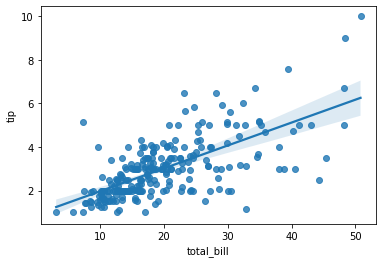

In [3]:
sns.regplot(data=tips,x='total_bill',y='tip')

#### 2. Change the styling of reg plot, only line, only scatter, show/hide the ci, change the ci value, change n_boot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

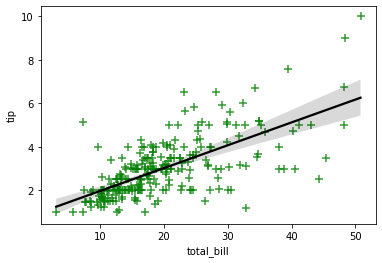

In [12]:
sns.regplot(data=tips,x='total_bill',y='tip', #ci = None,
            color='green',marker='+',
            line_kws=dict(color='black'),
            scatter_kws=dict(s=80,alpha=0.8),
            n_boot=1500)

## HEAT MAPS

A heatmap is a graphical representation of data where values are depicted by color.

In [2]:
mart=pd.read_csv(r'C:\Users\lenovo\Downloads\train.csv')
mart.columns = mart.columns.str.lower()
mart.head()

,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [32]:
mart.shape

(87864, 9)

In [3]:
martPiv = mart.pivot_table(index='outlet_year',columns='outlet_size',values='sales')
martPiv

outlet_size,High,Medium,Small
outlet_year,,,
1987,2015.037160,1792.973492,1917.302712
1988,1695.209700,1444.865311,1641.739583
1996,2265.268983,2272.371502,2219.790139
1997,2029.428925,1826.732664,1903.967543
1998,2306.542273,2279.666103,2233.775392
1999,2004.082749,1850.282194,1909.920236
2003,2261.028030,2158.063891,2190.118601
2004,1966.898730,1826.582596,1889.009488
2005,1935.238262,1010.230431,1215.937098


<AxesSubplot:xlabel='outlet_size', ylabel='outlet_year'>

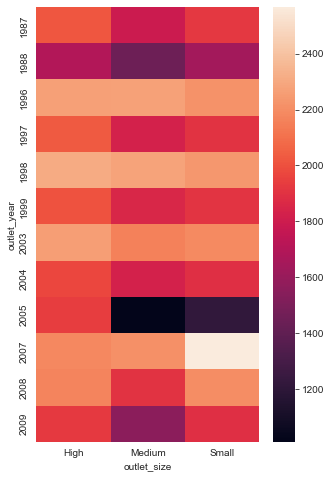

In [43]:
sns.set_style('white')
plt.figure(figsize=(5,8))
sns.heatmap(martPiv)

<AxesSubplot:xlabel='outlet_size', ylabel='outlet_year'>

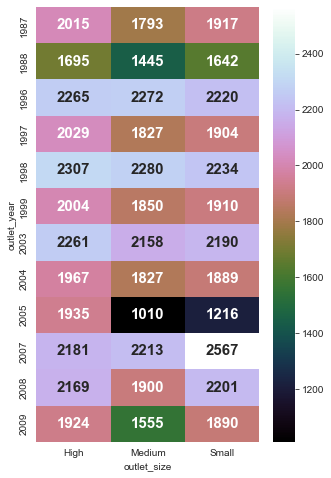

In [51]:
sns.set_style('white')
plt.figure(figsize=(5,8))
sns.heatmap(martPiv,
           annot=True, #to display values
           fmt='.0f', #to round the numbers
           annot_kws=dict(size=15,weight='bold'),
           #linewidth=0.5
           #linecolor='black
           cmap='cubehelix')

In [52]:
mart.corr()

,item_w,item_mrp,outlet_year,sales
item_w,1.000000,-0.022830,0.009632,0.000615
item_mrp,-0.022830,1.000000,-0.009837,0.014813
outlet_year,0.009632,-0.009837,1.000000,-0.035701
sales,0.000615,0.014813,-0.035701,1.000000


<AxesSubplot:>

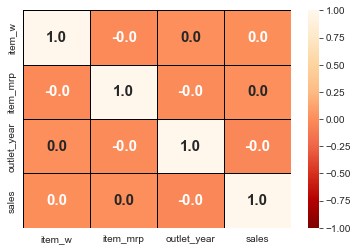

In [66]:
sns.heatmap(mart.corr(),
           vmin=-1,
           vmax=1,
           center=0,
           cmap='OrRd_r',
           annot=True,
           fmt='.1f',
           annot_kws=dict(size=15,weight='bold'),
           linecolor='black',
           linewidths=0.5)

## CLUSTER MAP

Plot a matrix dataset as hierarchically clustered heatmap

In [67]:
martPiv.head()

outlet_size,High,Medium,Small
outlet_year,,,
1987,2015.037160,1792.973492,1917.302712
1988,1695.209700,1444.865311,1641.739583
1996,2265.268983,2272.371502,2219.790139
1997,2029.428925,1826.732664,1903.967543
1998,2306.542273,2279.666103,2233.775392


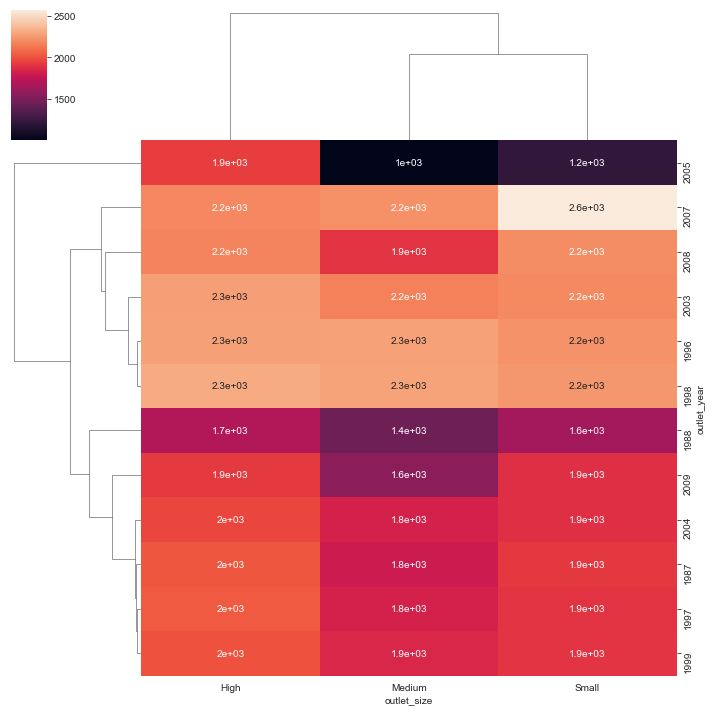

In [69]:
sns.clustermap(martPiv,
              #col_cluster=False, -- to remove the col clustering
              #row_cluster = False, -- to remove the row clustering
              annot=True,
              #z_score = 1,  -- 1 or 0\
              #standard_scale=1
              )

## FACET GRID PLOT

Multi-plot grid for plotting conditional relationships

In [70]:
mart.head()

,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [71]:
mart.outlet_size.unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [73]:
mart.outlet_location_type.unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

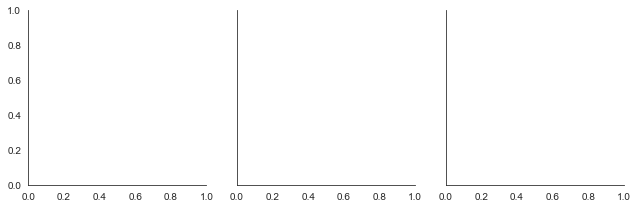

In [75]:
var = sns.FacetGrid(mart,col='outlet_size')

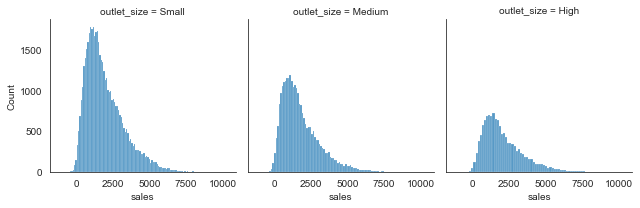

In [76]:
var = sns.FacetGrid(mart,col='outlet_size')
var.map_dataframe(sns.histplot,x='sales')

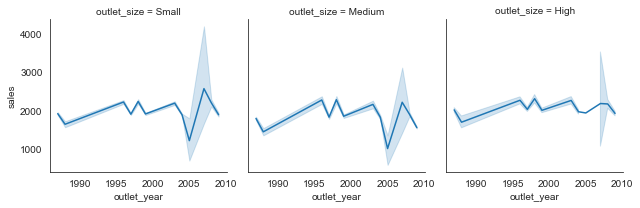

In [79]:
var = sns.FacetGrid(mart,col='outlet_size')
var.map_dataframe(sns.lineplot,x='outlet_year',y='sales')

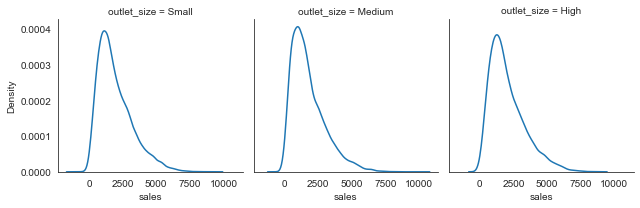

In [81]:
var = sns.FacetGrid(mart,col='outlet_size')
var.map_dataframe(sns.kdeplot,x='sales')

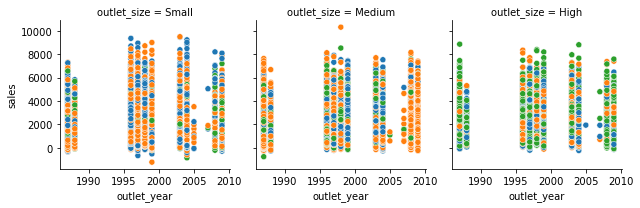

In [11]:
var = sns.FacetGrid(mart,col='outlet_size')
var.map_dataframe(sns.scatterplot,x='outlet_year',y='sales', hue='outlet_location_type')

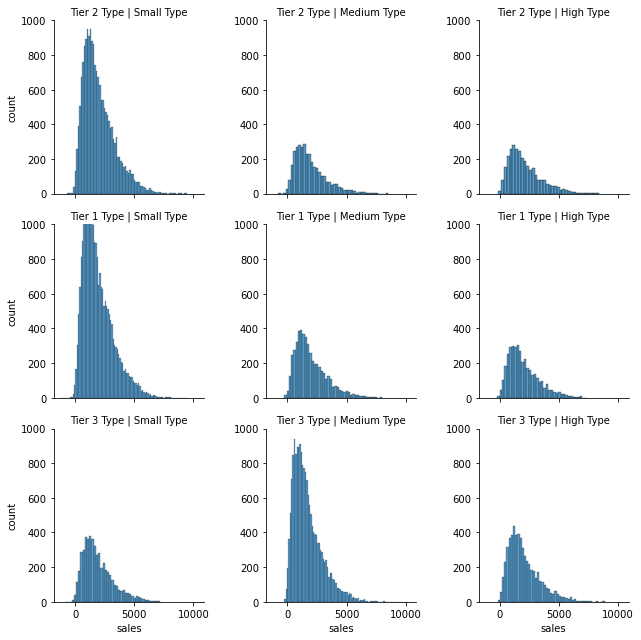

In [22]:
var = sns.FacetGrid(mart,col='outlet_size',row='outlet_location_type',
                    sharey=False, #to have unique y axes for each plot
                    ylim = (0,1000) # y axes limit'
                   )
                    
                    
var.map_dataframe(sns.histplot,x='sales')

var.set_axis_labels('sales','count') #setting labels for the axis

var.set_titles(col_template='{col_name} Type',row_template='{row_name} Type')